In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the base directory path where the Excel files are located
directory_path = '../../data/accuracy_results/'

# Define the subdirectories for different models
models = ['BASELINE', 'GRU', 'LSTM', 'SARIMA', 'TBATS']

# Define the data locations for NRMSE and NMAE for each forecast period
data_locations = {
    '14 Days Forecast': {'NRMSE': {'14 Days Training': (3, 'B:K'), 'Training:Testing = 75:25': (3, 'R:AA'), 'Training:Testing = 50:50': (3, 'AH:AQ')},
                        'NMAE': {'14 Days Training': (4, 'B:K'), 'Training:Testing = 75:25': (4, 'R:AA'), 'Training:Testing = 50:50': (4, 'AH:AQ')}},
    '7 Days Forecast': {'NRMSE': {'14 Days Training': (8, 'B:K'), 'Training:Testing = 75:25': (8, 'R:AA'), 'Training:Testing = 50:50': (8, 'AH:AQ')},
                        'NMAE': {'14 Days Training': (9, 'B:K'), 'Training:Testing = 75:25': (9, 'R:AA'), 'Training:Testing = 50:50': (9, 'AH:AQ')}},
    '3 Days Forecast': {'NRMSE': {'14 Days Training': (13, 'B:K'), 'Training:Testing = 75:25': (13, 'R:AA'), 'Training:Testing = 50:50': (13, 'AH:AQ')},
                       'NMAE': {'14 Days Training': (14, 'B:K'), 'Training:Testing = 75:25': (14, 'R:AA'), 'Training:Testing = 50:50': (14, 'AH:AQ')}},
    '1 Day Forecast': {'NRMSE': {'14 Days Training': (18, 'B:K'), 'Training:Testing = 75:25': (18, 'R:AA'), 'Training:Testing = 50:50': (18, 'AH:AQ')},
                        'NMAE': {'14 Days Training': (19, 'B:K'), 'Training:Testing = 75:25': (19, 'R:AA'), 'Training:Testing = 50:50': (19, 'AH:AQ')}}                   
}

# Initialize a list to hold the combined NRMSE and NMAE data
combined_data = []

# Iterate over each model directory
for model in models:
    # Construct the full path to the model directory
    model_path = os.path.join(directory_path, model)
    
    # List all Excel files in the directory
    excel_files = [f for f in os.listdir(model_path) if f.endswith('.xlsx')]
    
    # Iterate over each Excel file
    for file in excel_files:
        # Construct the full file path
        file_path = os.path.join(model_path, file)
        
        # Iterate over each forecast period and accuracy metric to extract data
        for forecast_period, metrics in data_locations.items():
            for metric, training_methods in metrics.items():
                for training_method, (row, columns) in training_methods.items():
                    try:
                        # Load the Excel file data for the specified range
                        df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                        # Flatten the data and extend the combined data list
                        values = df.values.flatten().tolist()
                        combined_data.extend([(model, forecast_period, metric, training_method, value) for value in values])
                    except Exception as e:
                        print(f"Error reading {file_path} for {forecast_period}, {metric}, {training_method}: {e}")

# Convert the combined data list to a DataFrame for plotting
combined_df = pd.DataFrame(combined_data, columns=['Model', 'Forecast Period', 'Metric', 'Training Method', 'Magnitude'])

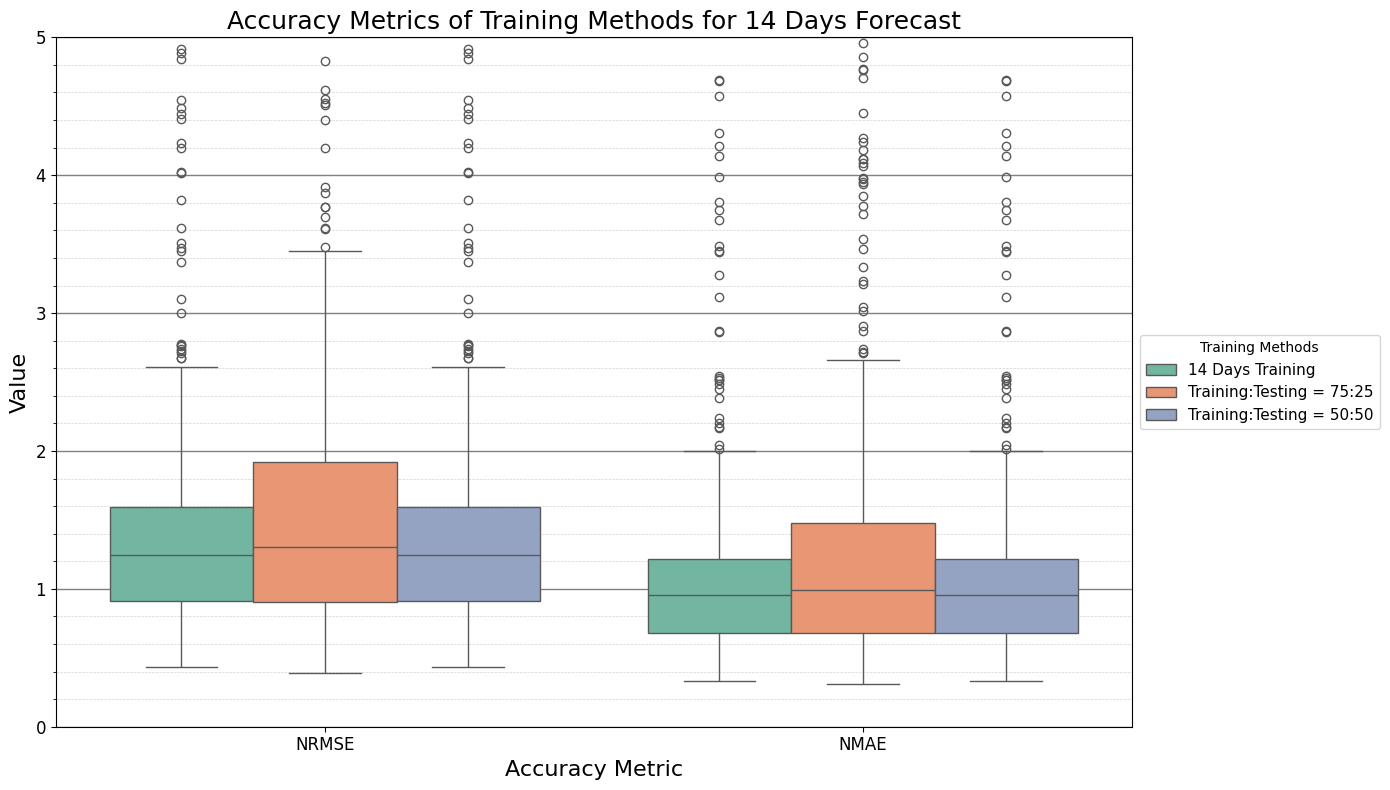

<Figure size 640x480 with 0 Axes>

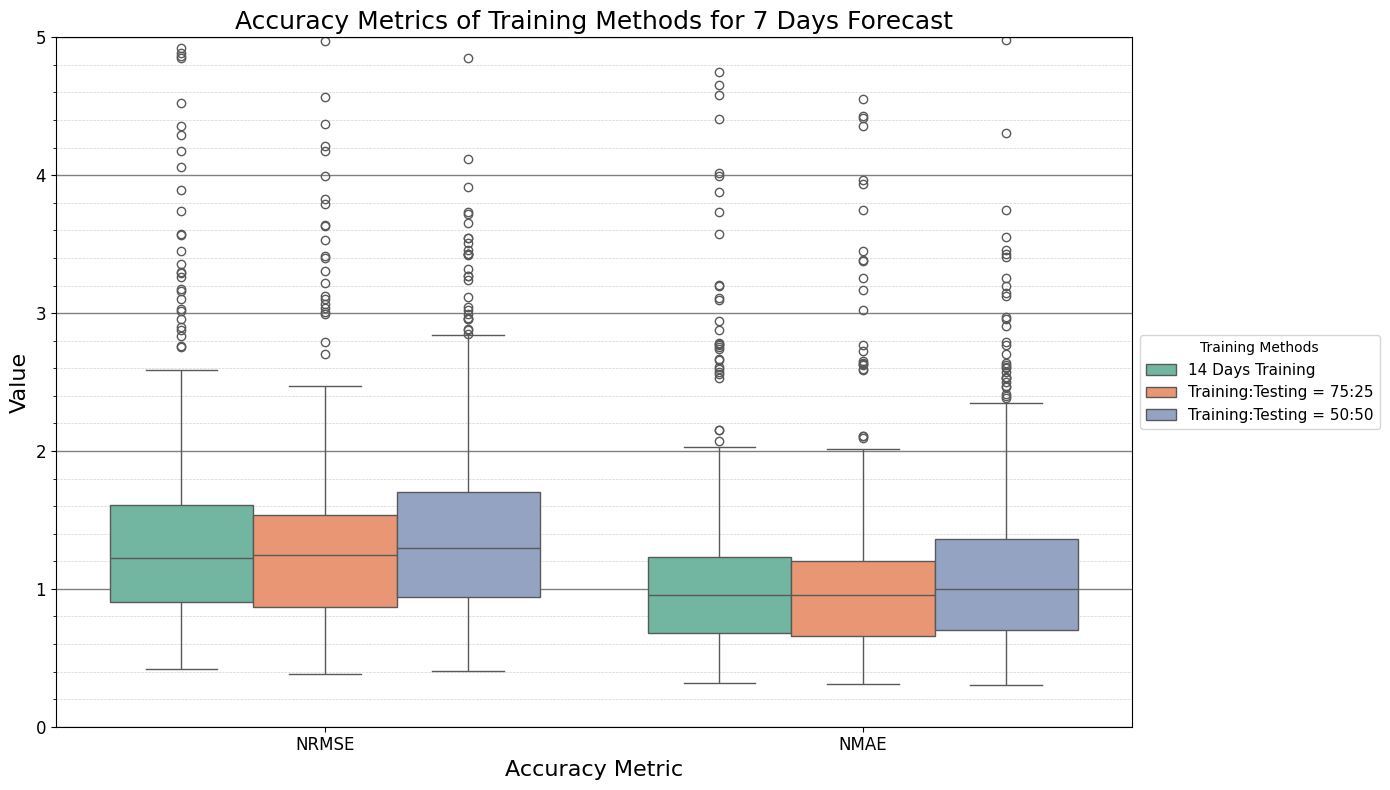

<Figure size 640x480 with 0 Axes>

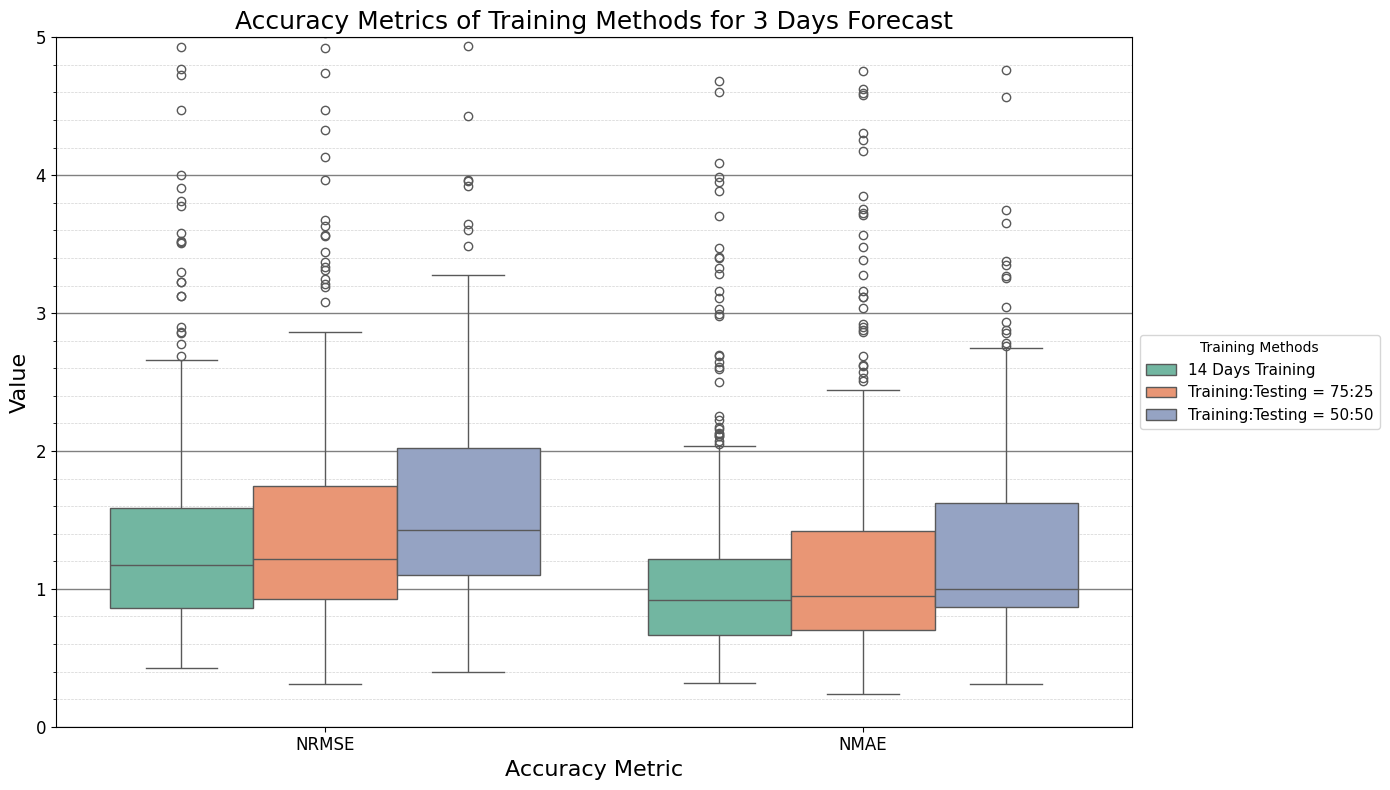

<Figure size 640x480 with 0 Axes>

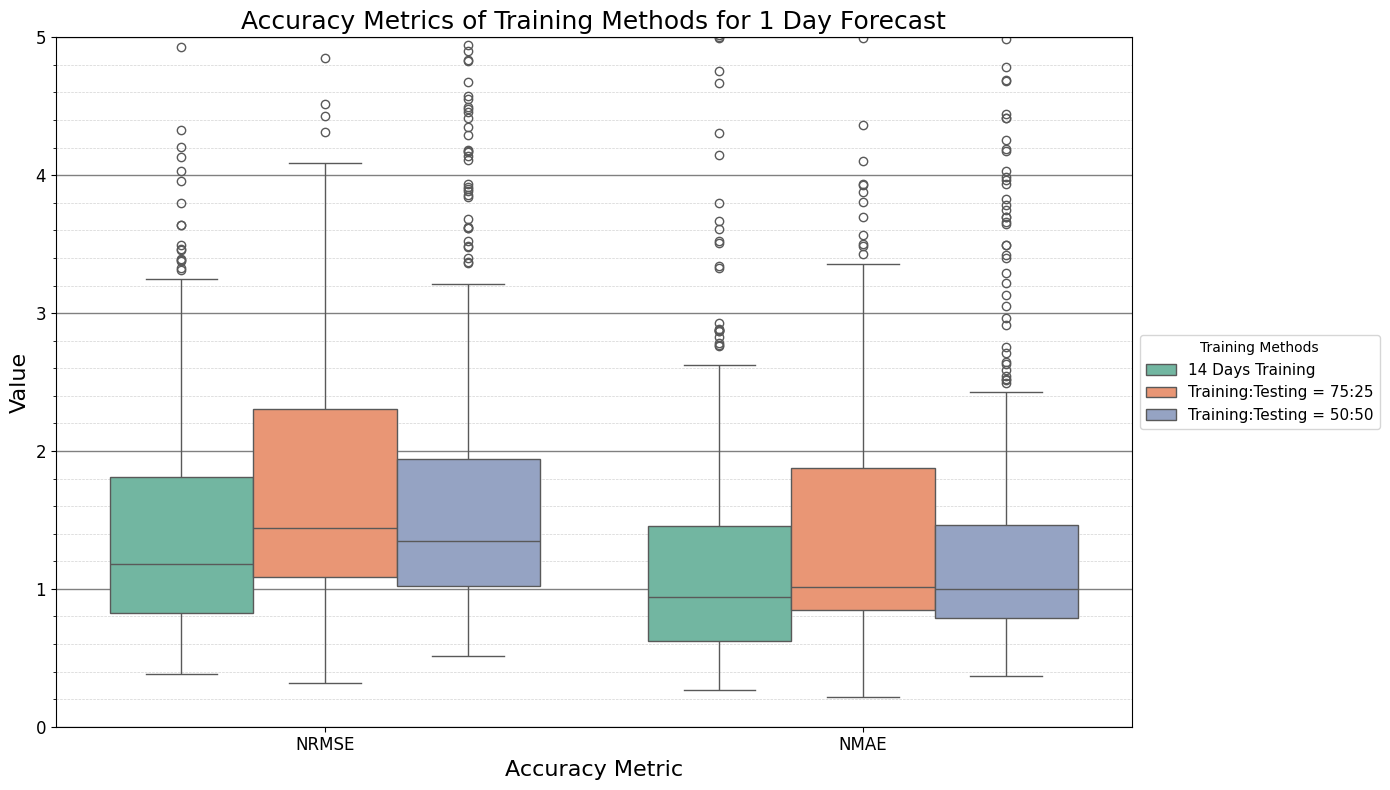

<Figure size 640x480 with 0 Axes>

In [3]:
# Accuracy Metrics of Different Training Methods for Specific Forecast Periods

# Loop through each forecast period to create separate plots
for forecast_period in data_locations.keys():
    # Filter the DataFrame for the current forecast period
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]
    
    # Creating the figure and axis objects
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.set_facecolor('white')

    # Plotting the boxplot
    sns.boxplot(data=period_df, x='Metric', y='Magnitude', hue='Training Method', palette='Set2')
    
    # Setting the common y-axis scale
    ax.set_ylim(0, 5)

    # Enabling minor ticks
    ax.minorticks_on()

    # Setting up grid lines
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Setting up x-axis and y-axis labels
    ax.set_xlabel('Accuracy Metric', fontsize=16)
    ax.set_ylabel('Value', fontsize=16)

    # Setting the x-tick labels horizontally and ensuring they match the unique metric names
    ax.set_xticks(range(len(combined_df['Metric'].unique())))
    ax.set_xticklabels(combined_df['Metric'].unique(), rotation=0, fontsize=12)

    # Disable minor x-ticks
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    
    # Creating the box plot
    plt.title(f'Accuracy Metrics of Training Methods for {forecast_period}',fontsize=18)
    plt.legend(title='Training Methods', bbox_to_anchor=(1, 0.5), loc='center left',fontsize=11)
    plt.tight_layout()

    # Check if the target directory exists
    target_dir = '../../visualisations/training_methods_accuracy'
    if not os.path.isdir(target_dir):
        os.makedirs(target_dir)

    # Define the file name based on model and forecast period, then save the plot
    file_name = os.path.join(target_dir, f'{forecast_period.replace(" ", "_")}_training_methods.png')
    plt.savefig(file_name)
    
    # Display the plot
    plt.show()
    
    # Clear the current figure to prepare for the next plot
    plt.clf()


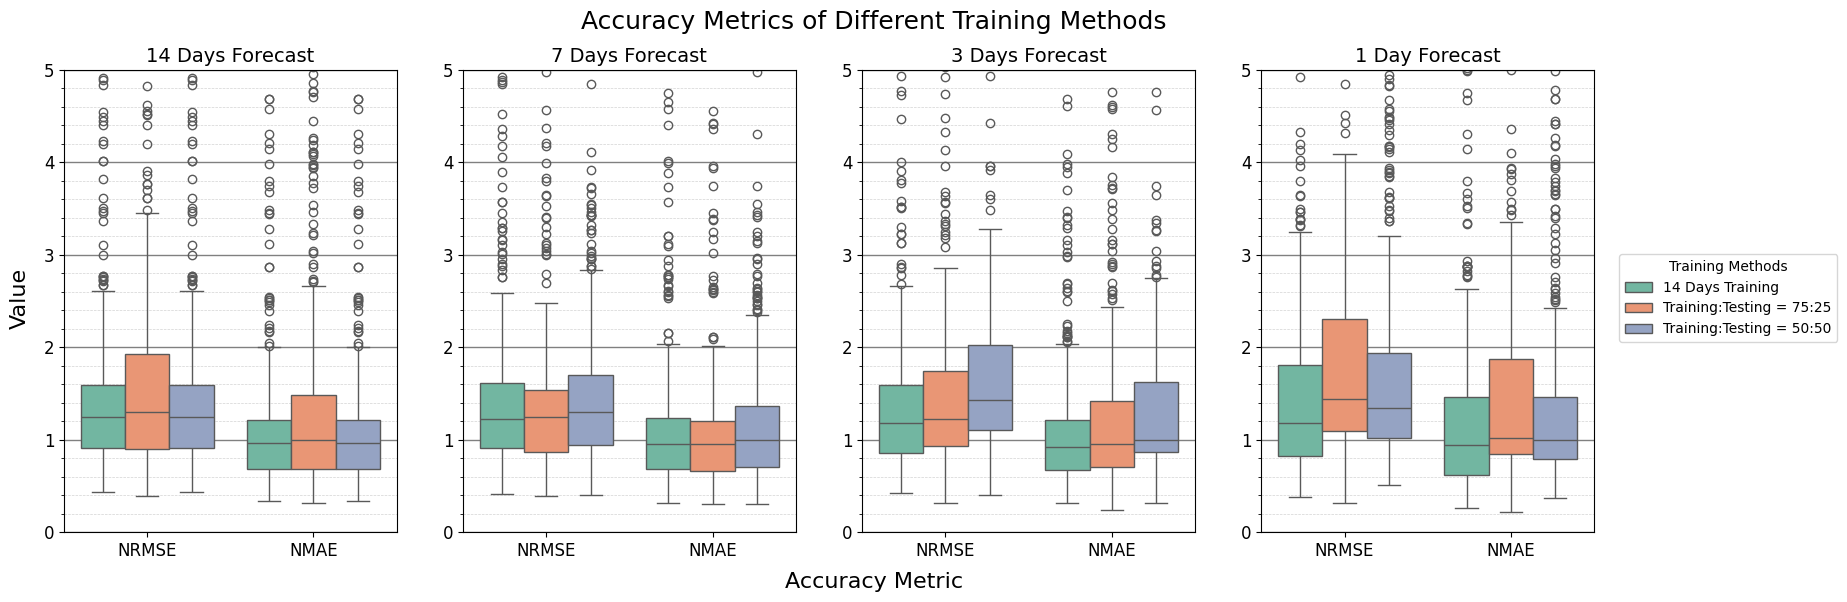

In [4]:
# Accuracy Metrics of Different Training Methods

# Creating subplots
fig, axes = plt.subplots(1, len(data_locations), figsize=(18, 6))

# Loop through each forecast period to create separate plots
for i, (forecast_period, metrics) in enumerate(data_locations.items()):
    ax = axes[i]
    # Filter the DataFrame for the current forecast period
    period_df = combined_df[combined_df['Forecast Period'] == forecast_period]
    
    # Plotting the boxplot
    sns.boxplot(data=period_df, x='Metric', y='Magnitude', hue='Training Method', palette='Set2', ax=ax)
    
    # Setting the common y-axis scale
    ax.set_ylim(0, 5)
    
    # Enabling minor ticks and setting up grid lines
    ax.minorticks_on()
    ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
    ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # Setting up title
    ax.set_title(f'{forecast_period}', fontsize=14)

    # Remove X and Y labels from all subplots
    ax.set_xlabel('')
    ax.set_ylabel('')

# Removing each plots legend
for ax in axes:
    ax.get_legend().remove()

# Setting the subtitle and labels
fig.suptitle("Accuracy Metrics of Different Training Methods", fontsize=18)
fig.supylabel('Value', fontsize=16)
fig.supxlabel('Accuracy Metric', fontsize=16)
fig.set_facecolor('white')

# Place and draw the legend on the figure
handles, labels = ax.get_legend_handles_labels()
legend = fig.legend(handles, labels, title='Training Methods', loc='center left', bbox_to_anchor=(0.91, 0.5), fontsize=10)
fig.subplots_adjust(left=0.05, right=0.9, wspace=0.2) # Adjust the left and right margins and the width space between subplots

# Check if the target directory exists
target_dir = '../../visualisations/training_methods_accuracy'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# Save the plot
file_name = os.path.join(target_dir, f'training_methods_accuracy.png')
plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5)

# Display the plot
plt.show()
